# Actividad 8.1 Ejercicio de modelos de regresión simple

Saulo César Beltrán Romero A0829482

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [3]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [4]:
vars = ['peso','cintura']
vars

['peso', 'cintura']

In [5]:
dfv = df[vars].dropna()
dfv

,peso,cintura
0,73.70,98.70
1,35.65,64.00
2,54.80,67.60
3,33.40,60.60
4,97.95,113.00
...,...,...
18635,75.80,93.00
18636,69.40,103.05
18637,46.75,71.35
18638,59.05,99.95


Una vez conociendo los datos y al haber acomodado los valores como nos interesan, podemos realizar el análisis de regresión lineal simple utilizando la variable de ‘peso’ como la variable independiente o ‘y’, y la variable ‘cintura’ como la dependiente o ‘x’. Dentro de la fórmula de regresión lineal, esto se observa así:

peso = b0 + b1 * cintura

A continuación, se mostrará el código y la tabla obtenida al realizar el análisis de regresión lineal simple.

In [6]:
#Código para análisis de regresión lineal simple

import statsmodels.api as sm
model = sm.OLS.from_formula('peso~cintura', #formla reg, peso = b0 + b1 * cintura
                           data = dfv)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:57:34   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dentro de los valores mostrados en la tabla anterior se incluyen los valores de la pendiente, la ordenada al origen (B0 o intercepto) y el coeficiente de regresión parcial (B1).

Posteriormente se realizó una gráfica de dispersión de los valores originales vs. residuales:

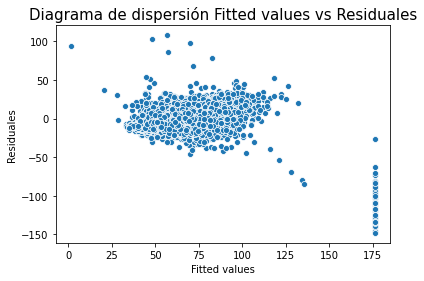

In [7]:
#Código para grafica de dispersión

pp = sns.scatterplot(x = result.fittedvalues,
                    y = result.resid)
pp.set_xlabel('Fitted values',
             size = 10)
pp.set_ylabel('Residuales',
             size = 10)
pp.set_title('Diagrama de dispersión Fitted values vs Residuales',
            size = 15)
plt.show()

Después se realizaron las siguientes líneas de código para poder graficar una línea de regresión sobre los valores de las variables peso y cintura.

In [8]:
X = pd.DataFrame(dfv['cintura'])
Y = pd.DataFrame(dfv['peso'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(X, Y)
model_lm

LinearRegression()

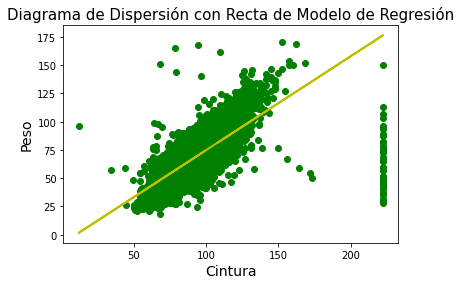

In [9]:
#Diagrama de dispersión
plt.scatter(x = X,
            y = Y,
           c = 'g')
plt.xlabel('Cintura',
          size = 14)
plt.ylabel('Peso',
          size = 14)
plt.title('Diagrama de Dispersión con Recta de Modelo de Regresión',
         size = 15)
#Linea de regresion
plt.plot(X, 
         model_lm.predict(X), 
         linewidth=2, 
        color = 'y')

plt.show()

Como se puede observar en el gráfico obtenido, primeramente, se indicó las variables en los ejes por graficar, ‘cintura’ para ‘x’ y ‘peso’ para ‘y’, posteriormente se indico la línea de regresión dando uso a algunas funciones de librerías. 

In [10]:
result.resid

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

Por último, para calcular los valores de los residuos se dio uso a la función ‘result.resid’, la cual muestra los valores de los residuos obtenidos por cada renglón, debido a que estos son mas de 18000, solamente se muestra una pequeña cantidad de estos datos.

Para la realización de los siguientes puntos, se pide la separación de los datos según el sexo al que correspondan. Para lograr esto, se dio uno a la funciones 'loc'. Debido a que dentro de la base de datos no se expresa explícitamente que sexo es cual, se tomó la libertad de considerar los valores de 2 como mujeres y los de 1 como hombres. 

In [11]:
hombres = df.loc[df['sexo']==1]
mujeres = df.loc[df['sexo']==2]

# Hombres

In [12]:
import statsmodels.api as sm
model = sm.OLS.from_formula('peso~cintura', #formla reg, peso = b0 + b1 * cintura
                           data = hombres)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 2.022e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:57:35   Log-Likelihood:                -30486.
No. Observations:                8154   AIC:                         6.098e+04
Df Residuals:                    8152   BIC:                         6.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.5015      0.599    -27.556      0.000     -17.675     -15.328
cintura        0.9558      0.007    142.200      0.000       0.943       0.969
==============================================================================
Omnibus:                     6572.799   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           878711.348
Skew:                          -3.142   Prob(JB):                         0.00
Kurtosis:                      53.466   Cond. No.                         474.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

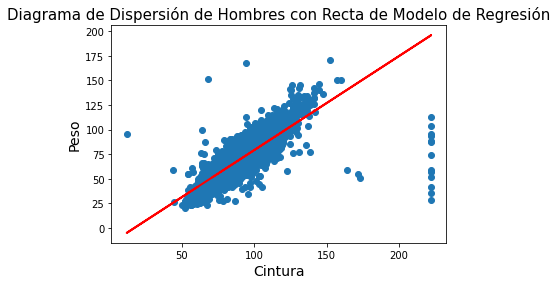

In [16]:
X = pd.DataFrame(hombres['cintura'])
Y = pd.DataFrame(hombres['peso'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(X, Y)
model_lm

#Diagrama de dispersión
plt.scatter(x = X,
            y = Y)
plt.xlabel('Cintura',
          size = 14)
plt.ylabel('Peso',
          size = 14)
plt.title('Diagrama de Dispersión de Hombres con Recta de Modelo de Regresión',
         size = 15)
#Linea de regresion
plt.plot(X, 
         model_lm.predict(X), 
         linewidth=2, 
        color = 'r')

plt.show()

# Mujeres

In [14]:
model = sm.OLS.from_formula('peso~cintura', #formla reg, peso = b0 + b1 * cintura
                           data = mujeres)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:57:36   Log-Likelihood:                -37386.
No. Observations:                9878   AIC:                         7.478e+04
Df Residuals:                    9876   BIC:                         7.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1852      0.562     -3.887      0.000      -3.287      -1.083
cintura        0.7368      0.006    117.510      0.000       0.724       0.749
==============================================================================
Omnibus:                     6504.425   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441820.169
Skew:                          -2.437   Prob(JB):                         0.00
Kurtosis:                      35.399   Cond. No.                         470.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

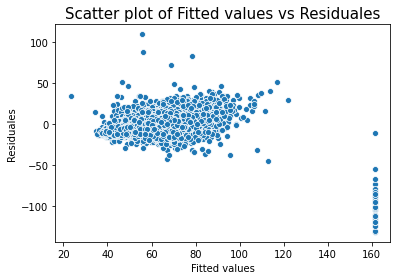

In [15]:
pp = sns.scatterplot(x = result.fittedvalues,
                    y = result.resid)
pp.set_xlabel('Fitted values',
             size = 10)
pp.set_ylabel('Residuales',
             size = 10)
pp.set_title('Scatter plot of Fitted values vs Residuales',
            size = 15)
plt.show()